In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import svm

In [45]:
df=pd.read_csv('heart.csv')

In [46]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [47]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,999.000000,999.000000,999.000000,999.000000
mean,29.114875,4.628629,3.319319,7.242242
std,6.577840,9.085169,7.680437,1.646450
min,14.690000,0.000000,0.000000,1.000000
25%,24.800000,0.000000,0.000000,6.000000
50%,28.120000,0.000000,0.000000,7.000000
75%,32.690000,4.000000,2.000000,8.000000
max,75.820000,30.000000,30.000000,18.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      999 non-null    object 
 1   BMI               999 non-null    float64
 2   Smoking           999 non-null    object 
 3   AlcoholDrinking   999 non-null    object 
 4   Stroke            999 non-null    object 
 5   PhysicalHealth    999 non-null    int64  
 6   MentalHealth      999 non-null    int64  
 7   DiffWalking       999 non-null    object 
 8   Sex               999 non-null    object 
 9   AgeCategory       999 non-null    object 
 10  Race              999 non-null    object 
 11  Diabetic          999 non-null    object 
 12  PhysicalActivity  999 non-null    object 
 13  GenHealth         999 non-null    object 
 14  SleepTime         999 non-null    int64  
 15  Asthma            999 non-null    object 
 16  KidneyDisease     999 non-null    object 
 1

In [49]:
df.shape

(999, 18)

In [50]:
df.count()

HeartDisease        999
BMI                 999
Smoking             999
AlcoholDrinking     999
Stroke              999
PhysicalHealth      999
MentalHealth        999
DiffWalking         999
Sex                 999
AgeCategory         999
Race                999
Diabetic            999
PhysicalActivity    999
GenHealth           999
SleepTime           999
Asthma              999
KidneyDisease       999
SkinCancer          999
dtype: int64

In [51]:
df['HeartDisease'].value_counts()

No     848
Yes    151
Name: HeartDisease, dtype: int64

In [52]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [53]:
data=df.drop('HeartDisease',axis=1)

In [54]:
le_HeartDisease=LabelEncoder()
le_Smoking=LabelEncoder()
le_AlcoholDrinking=LabelEncoder()
le_Stroke=LabelEncoder()
le_DiffWalking=LabelEncoder()
le_Sex=LabelEncoder()
le_AgeCategory=LabelEncoder()
le_Race=LabelEncoder()
le_Diabetic=LabelEncoder()
le_PhysicalActivity=LabelEncoder()
le_GenHealth=LabelEncoder()
le_Asthma=LabelEncoder()
le_KidneyDisease=LabelEncoder()
le_SkinCancer=LabelEncoder()

In [55]:
df['HeartDisease_n'] = le_HeartDisease.fit_transform(df['HeartDisease'])
data['Smoking_n'] = le_Smoking.fit_transform(data['Smoking'])
data['AlcoholDrinking_n'] = le_AlcoholDrinking.fit_transform(data['AlcoholDrinking'])
data['Stroke_n'] = le_Stroke.fit_transform(data['Stroke'])
data['DiffWalking_n'] = le_DiffWalking.fit_transform(data['DiffWalking'])
data['Sex_n'] = le_Sex.fit_transform(data['Sex'])
data['AgeCategory_n'] = le_AgeCategory.fit_transform(data['AgeCategory'])
data['Race_n'] = le_Race.fit_transform(data['Race'])
data['Diabetic_n'] = le_Diabetic.fit_transform(data['Diabetic'])
data['GenHealth_n'] = le_GenHealth.fit_transform(data['GenHealth'])
data['PhysicalActivity_n'] = le_PhysicalActivity.fit_transform(data['PhysicalActivity'])
data['Asthma_n'] = le_Asthma.fit_transform(data['Asthma'])
data['KidneyDisease_n'] = le_KidneyDisease.fit_transform(data['KidneyDisease'])
data['SkinCancer_n'] = le_SkinCancer.fit_transform(data['SkinCancer'])

In [56]:
target=df['HeartDisease']

In [57]:
data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,...,DiffWalking_n,Sex_n,AgeCategory_n,Race_n,Diabetic_n,GenHealth_n,PhysicalActivity_n,Asthma_n,KidneyDisease_n,SkinCancer_n
0,16.60,Yes,No,No,3,30,No,Female,55-59,White,...,0,0,7,5,2,4,1,1,0,1
1,20.34,No,No,Yes,0,0,No,Female,80 or older,White,...,0,0,12,5,0,4,1,0,0,0
2,26.58,Yes,No,No,20,30,No,Male,65-69,White,...,0,1,9,5,2,1,1,1,0,0
3,24.21,No,No,No,0,0,No,Female,75-79,White,...,0,0,11,5,0,2,0,0,0,1
4,23.71,No,No,No,28,0,Yes,Female,40-44,White,...,1,0,4,5,0,4,1,0,0,0


In [60]:
main=data.drop(['Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer','GenHealth'],axis=1)

In [77]:
main.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_n,AlcoholDrinking_n,Stroke_n,DiffWalking_n,Sex_n,AgeCategory_n,Race_n,Diabetic_n,GenHealth_n,PhysicalActivity_n,Asthma_n,KidneyDisease_n,SkinCancer_n
0,16.60,3,30,5,1,0,0,0,0,7,5,2,4,1,1,0,1
1,20.34,0,0,7,0,0,1,0,0,12,5,0,4,1,0,0,0
2,26.58,20,30,8,1,0,0,0,1,9,5,2,1,1,1,0,0
3,24.21,0,0,6,0,0,0,0,0,11,5,0,2,0,0,0,1
4,23.71,28,0,8,0,0,0,1,0,4,5,0,4,1,0,0,0


<AxesSubplot:xlabel='PhysicalHealth', ylabel='MentalHealth'>

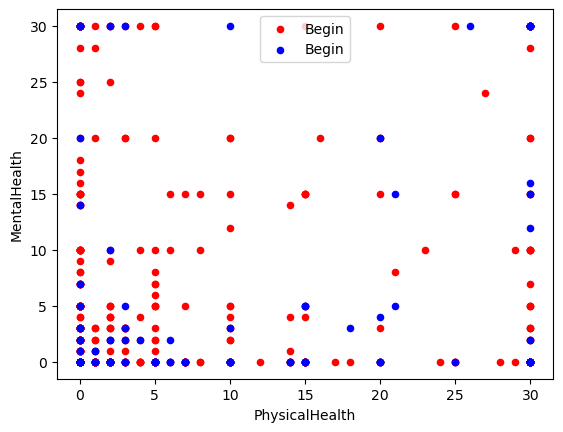

In [74]:
begin1_df=df[df['HeartDisease_n']==0]
axes=begin1_df.plot(kind='scatter',x='PhysicalHealth',y='MentalHealth',color='red',label='Begin')
begin2_df=df[df['HeartDisease_n']==1]
begin2_df.plot(kind='scatter',x='PhysicalHealth',y='MentalHealth',color='blue',label='Begin',ax=axes)



In [79]:
main.dtypes

BMI                   float64
PhysicalHealth          int64
MentalHealth            int64
SleepTime               int64
Smoking_n               int32
AlcoholDrinking_n       int32
Stroke_n                int32
DiffWalking_n           int32
Sex_n                   int32
AgeCategory_n           int32
Race_n                  int32
Diabetic_n              int32
GenHealth_n             int32
PhysicalActivity_n      int32
Asthma_n                int32
KidneyDisease_n         int32
SkinCancer_n            int32
dtype: object

In [85]:
x_train, x_test, y_train, y_test = train_test_split(main,target,test_size=0.3,random_state=0)

In [84]:
x_train.shape
x_test.shape

(300, 17)

In [95]:
svm1=svm.SVC(kernel='linear',gamma='auto',C=50)
svm1.fit(x_train,y_train)

SVC(C=50, gamma='auto', kernel='linear')

In [96]:
y_pred=svm1.predict(x_test)

In [97]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[258   0]
 [ 42   0]]


0.86

In [98]:
#entire report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       1.00      0.86      0.92       300
         Yes       0.00      0.00      0.00         0

    accuracy                           0.86       300
   macro avg       0.50      0.43      0.46       300
weighted avg       1.00      0.86      0.92       300



C:\Users\Fenil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fenil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fenil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
